In [1]:
import pickle
import pandas as pd
import numpy as np
import os

In [2]:
SUBJECTS_PATH='data/Subjects_ActionNet_EMG'
DATA_PATH='data/ActionNet_EMG'
TRAINVAL_PATH='train_val'

with open(os.path.join(DATA_PATH,'ActionNet_test_emg.pkl'), 'rb') as f:
    test = pd.read_pickle(f)
    
with open(os.path.join(DATA_PATH,'ActionNet_train_emg.pkl'), 'rb') as f:
    train = pd.read_pickle(f)

with open(os.path.join(SUBJECTS_PATH,'S04_1.pkl'), 'rb') as f:
    s04 = pd.read_pickle(f)
    
with open(os.path.join(DATA_PATH,'S04.pkl'), 'rb') as f:
    s04_rgb = pd.read_pickle(f)
    
with open(os.path.join(DATA_PATH,'ActionNet_kfold_multimodal.pkl'), 'rb') as f:
    s04_kfold = pd.read_pickle(f)
    
with open(os.path.join(DATA_PATH,'ActionNet_kfold_multimodal_filtered.pkl'), 'rb') as f:
    s04_kfold_filtered = pd.read_pickle(f)
    
with open(os.path.join(TRAINVAL_PATH,"ActionNet_test.pkl"), 'rb') as f:
    test_split = pd.read_pickle(f)
    
with open(os.path.join(TRAINVAL_PATH,"ActionNet_train.pkl"), 'rb') as f:
    train_split = pd.read_pickle(f)
    
""" with open(os.path.join(DATA_PATH,'ActionNet_train_emg_augmented.pkl'), 'rb') as f:
    aug_train = pd.read_pickle(f) 
    
with open(os.path.join(DATA_PATH,'ActionNet_test_emg_augmented.pkl'), 'rb') as f:
    aug_test = pd.read_pickle(f) """

FileNotFoundError: [Errno 2] No such file or directory: 'data/ActionNet_EMG/ActionNet_test_emg.pkl'

In [15]:

def dataset_information(df, label='description'):
    if type(df)==str:
        with open(df, 'rb') as f:
            df = pd.read_pickle(f)
    #print(df.head())  
    print("Columns: ", df.columns)
    print("Number of samples: ", len(df))
    print("Number of classes: ", len(df[label].unique()))
    classes = df[label].unique()
    classes.sort()
    # Number of samples per class
    print("Number of samples per label: ")
    for c in range(len(classes)):
        print(c,":", len(df[df["label"]==c]))
    # Find mean and std of the samples

In [16]:
dataset_information(os.path.join("data/ActionNet/train_EMG_augmented.pkl"))

Columns:  Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings',
       'Subject', 'label'],
      dtype='object')
Number of samples:  10540
Number of classes:  20
Number of samples per label: 
0 : 480
1 : 440
2 : 820
3 : 520
4 : 480
5 : 520
6 : 160
7 : 200
8 : 160
9 : 1520
10 : 160
11 : 520
12 : 500
13 : 480
14 : 480
15 : 500
16 : 1360
17 : 180
18 : 500
19 : 560


In [6]:
dataset_information(os.path.join(DATA_PATH,'ActionNet_train_multimodal_filtered.pkl'))

Columns:  Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings',
       'Subject', 'label'],
      dtype='object')
Number of samples:  51
Number of classes:  19
Classes:  ['Clean a pan with a sponge' 'Clean a pan with a towel'
 'Clean a plate with a sponge' 'Clean a plate with a towel'
 'Clear cutting board'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Open/close a jar of almond butter' 'Peel a cucumber' 'Peel a potato'
 'Pour water from a pitcher into a glass' 'Slice a cucumber'
 'Slice a potato' 'Slice bread' 'Spread almond butter on a bread slice'
 'Spread jelly on a bread slice'
 'Stack on table: 3 each large/small plates, bowls'
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensi

# Merged Dataset

In [86]:
dataset_information(os.path.join(DATA_PATH,"S04.pkl"), label='description')

Columns:  Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings'],
      dtype='object')
Number of samples:  60
Number of classes:  21
Classes:  ['Clean a pan with a sponge' 'Clean a pan with a towel'
 'Clean a plate with a sponge' 'Clean a plate with a towel'
 'Clear cutting board'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Open/close a jar of almond butter' 'Peel a cucumber' 'Peel a potato'
 'Pour water from a pitcher into a glass'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Slice a cucumber' 'Slice a potato' 'Slice bread'
 'Spread almond butter on a bread slice' 'Spread jelly on a bread slice'
 'Stack on table: 3 each large/small plates, bowls'
 'Unload dishwasher: 3 each lar

In [87]:
dataset_information(os.path.join(DATA_PATH,"ActionNet_test_S04.pkl"), label='description')

Columns:  Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings',
       'Subject'],
      dtype='object')
Number of samples:  8
Number of classes:  7
Classes:  ['Clean a pan with a towel' 'Clean a plate with a towel'
 'Clear cutting board' 'Open/close a jar of almond butter'
 'Pour water from a pitcher into a glass'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Spread almond butter on a bread slice']


In [74]:
dataset_information(train_split, label='description')

Number of samples:  527
Number of classes:  22
Classes:  ['Clean a pan with a sponge' 'Clean a pan with a towel'
 'Clean a plate with a sponge' 'Clean a plate with a towel'
 'Clear cutting board'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Get items from refrigerator/cabinets/drawers'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Open a jar of almond butter' 'Open/close a jar of almond butter'
 'Peel a cucumber' 'Peel a potato'
 'Pour water from a pitcher into a glass'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Slice a cucumber' 'Slice a potato' 'Slice bread'
 'Spread almond butter on a bread slice' 'Spread jelly on a bread slice'
 'Stack on table: 3 each large/small plates, bowls'
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils']
    index       file           

In [73]:
dataset_information(test_split, label="description")

Number of samples:  59
Number of classes:  20
Classes:  ['Clean a pan with a towel' 'Clean a plate with a sponge'
 'Clean a plate with a towel' 'Clear cutting board'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Get items from refrigerator/cabinets/drawers'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Open/close a jar of almond butter' 'Peel a cucumber' 'Peel a potato'
 'Pour water from a pitcher into a glass'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Slice a cucumber' 'Slice a potato' 'Slice bread'
 'Spread almond butter on a bread slice' 'Spread jelly on a bread slice'
 'Stack on table: 3 each large/small plates, bowls'
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils']
    index       file                                       description  \
4       4  S02_2.p

In [63]:
dataset_information(train)

Number of samples:  527
Number of classes:  22
Classes:  ['Spread jelly on a bread slice'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Clear cutting board' 'Slice a cucumber' 'Clean a pan with a sponge'
 'Clean a pan with a towel' 'Get items from refrigerator/cabinets/drawers'
 'Slice a potato' 'Pour water from a pitcher into a glass'
 'Spread almond butter on a bread slice'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Slice bread' 'Clean a plate with a sponge' 'Peel a cucumber'
 'Clean a plate with a towel' 'Open a jar of almond butter'
 'Peel a potato' 'Open/close a jar of almond butter'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Stack on table: 3 each large/small plates, bowls'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils']
                                

# Augmented Dataset

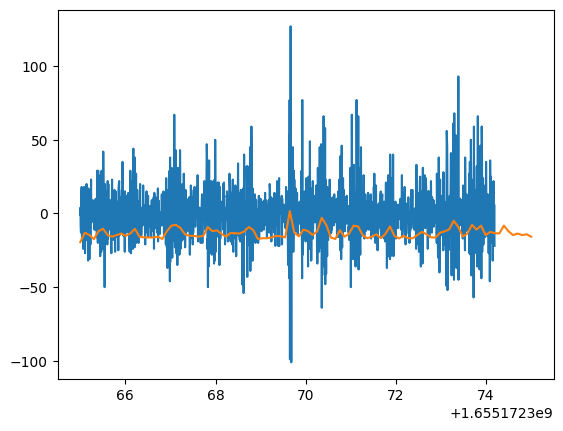

In [53]:
import matplotlib.pyplot as plt
num=100
plt.plot(test["myo_left_timestamps"].iloc[0][0:num*15], test["myo_left_readings"].iloc[0][:,0][0:num*15])
plt.plot(aug_test["myo_left_timestamps"].iloc[0][0:num], aug_test["myo_left_readings"].iloc[0][:,0][0:num]*20)

In [19]:
import pandas as pd

In [20]:
initial= pd.read_pickle("/Users/manuelescobar/Files/2023-2/AML/MEAR/Multimodal-Egocentric-Action-Recognition/action-sense/data/temp_a/train_emg.pkl")
processed= pd.read_pickle("/Users/manuelescobar/Files/2023-2/AML/MEAR/Multimodal-Egocentric-Action-Recognition/action-sense/data/temp_a/train_merge.pkl")

In [21]:
print(initial["myo_left_readings"].head())
print(processed["myo_left_readings"].head())

40    [[-1.0446161729358687, -0.3405637377935135, 1....
10    [[-1.5833389963599647, -2.155978803913611, -0....
6     [[-0.9099354670798447, -0.5056014710771587, -0...
24    [[-1.3139775846479167, -0.6706392043608039, -2...
6     [[-0.9099354670798447, -1.3307901374953848, -2...
Name: myo_left_readings, dtype: object
40    [[4, 12, 21, -21, 3, -2, -5, 7], [-6, -5, -5, ...
10    [[2, 2, -11, -8, -2, -7, 19, 5], [24, 17, -7, ...
6     [[7, 10, 11, 10, 6, 10, 10, 7], [-7, -24, -22,...
24    [[-7, -10, -6, 9, 7, -6, -18, 5], [17, -3, -18...
6     [[7, -6, -2, -11, -22, -33, -17, 5], [-13, 3, ...
Name: myo_left_readings, dtype: object


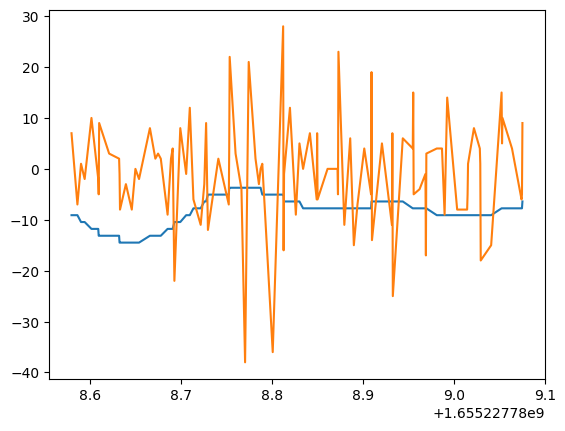

In [23]:
import matplotlib.pyplot as plt
num=100
idx=2
plt.plot(initial["myo_left_timestamps"].iloc[idx][0:num], initial["myo_left_readings"].iloc[idx][:,0][0:num]*10)
plt.plot(processed["myo_left_timestamps"].iloc[idx][0:num], processed["myo_left_readings"].iloc[idx][:,0][0:num])